In [1]:
%matplotlib inline
#import warnings; warnings.simplefilter('always')

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from scipy import optimize
from scipy.optimize import curve_fit



import os
from functools import reduce
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats.mstats import gmean

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

/Users/eisen/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def decayfunc(t,A0,t2):
    return A0 * np.power(2,-t/t2)

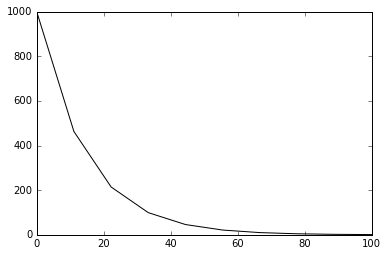

In [4]:
t0 = 0
t_end = 100
t2 = 10
n = 10
A0 = 1000

times = np.linspace(t0,t_end,n)
d = decayfunc(times,A0,t2)

plt.plot(times,d, c='black')

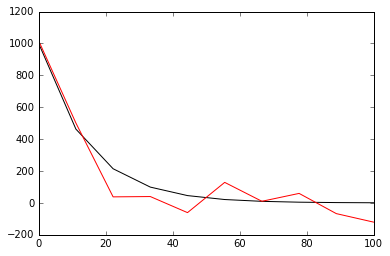

In [5]:
t0 = 0
t_end = 100
t2 = 10
n = 10
A0 = 1000

times = np.linspace(t0,t_end,n)
d = decayfunc(times,A0,t2)
plt.plot(times,d, c='black')
d = decayfunc(times,A0,t2) + np.random.normal(0,100,n)
plt.plot(times,d, c='red')

[  1.82024136e+02  -5.72151247e+08]


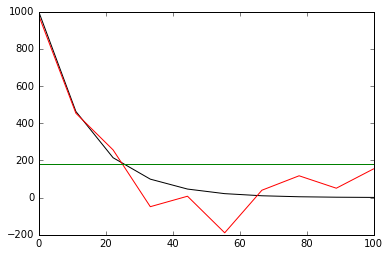

In [6]:
t0 = 0
t_end = 100
t2 = 10
n = 10
A0 = 1000

times = np.linspace(t0,t_end,n)

d = decayfunc(times,A0,t2) + np.random.normal(0,100,n)
fit,cv = curve_fit(decayfunc, times, d)

print (fit)

plt.plot(times,decayfunc(times,A0,t2),c='black')
plt.plot(times,d,c='red')
plt.plot(times,decayfunc(times,fit[0],fit[1]),c='green')

[  1.82024136e+02  -5.72151247e+08]


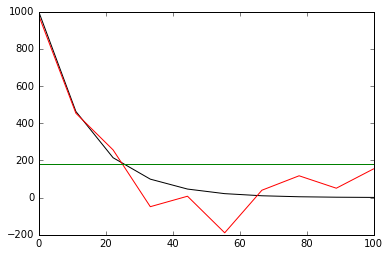

In [7]:
t0 = 0
t_end = 100
t2 = 10
n = 10
A0 = 1000

times = np.linspace(t0,t_end,n)

guess = [A0,t2]
fit,cv = curve_fit(decayfunc, times, d)

print (fit)

plt.plot(times,decayfunc(times,A0,10),c='black')
plt.plot(times,d,c='red')
plt.plot(times,decayfunc(times,fit[0],fit[1]),c='green')

[ 994.46495734    8.97468798]


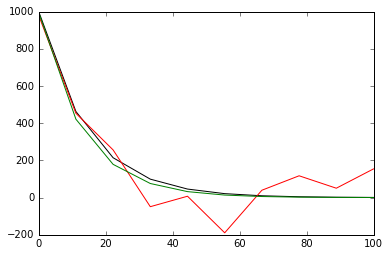

In [8]:
t0 = 0
t_end = 100
t2 = 10
n = 10
A0 = 1000

times = np.linspace(t0,t_end,n)

guess = [A0,t2]

fit,cv = curve_fit(decayfunc, times, d, bounds=( (A0/2,t2/2) , (2*A0,t2*2)) )

print (fit)

plt.plot(times,decayfunc(times,A0,t2),c='black')
plt.plot(times,d,c='red')
plt.plot(times,decayfunc(times,fit[0],fit[1]),c='green')

[ 994.46524517    8.97467416]


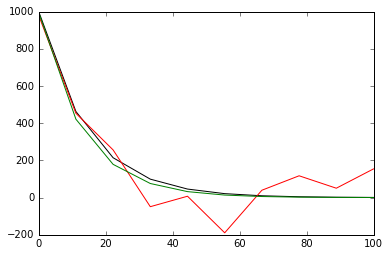

In [9]:
guess = [A0,t2]

fit,cv = curve_fit(decayfunc, times, d, bounds=( (d[0]/2,0) , (2*d[0],20)) )

print (fit)

plt.plot(times,decayfunc(times,A0,10),c='black')
plt.plot(times,d,c='red')
plt.plot(times,decayfunc(times,fit[0],fit[1]),c='green')

In [10]:
datafile = "decaydata.spike.norm"
df = pd.read_csv(datafile,sep="\t")
df = df.drop(df.index[[0,1,2]])
df = df.set_index('gene_id')

bad = ['YBL071C-B',
 'YBR221W-A',
 'YDR320W-B',
 'YER046W-A',
 'YGL006W-A',
 'YJL136W-A',
 'YKL106C-A',
 'YLR279W',
 'YMR052C-A',
 'YMR247W-A',
 'YOR161C-C']

df = df.drop(bad)

df = df[df['T1'] > 50]

In [11]:
datacols = []
times = []
for i in range(1,13):
    datacols.append("T%d" % i)
    times.append((i-1) * 5.0)
    
times = np.array(times)

In [12]:
def decayfunc(t,A0,t2):
    return A0 * np.power(2,-t/t2)

fits = []

for i,r in df.iterrows():
    
    data = np.array(r[datacols].values,dtype=float) 
    guess = np.array([data[0],10.0])
    fit,covp = curve_fit(decayfunc, times, data, guess, bounds=( (data[0]/2,0.0) , (2*data[0],50.0)) )
    fits.append(fit)
    
fits = np.matrix(fits)

df['A0'] = fits[:,0]
df['t_half'] = fits[:,1]

In [16]:
df

,gene_short_name,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,A0,t_half
gene_id,,,,,,,,,,,,,,,
Q0050,AI1,53.854281,24.967534,29.987314,18.008157,28.194435,16.107006,18.229885,18.307994,24.975402,19.612700,15.963094,22.557377,37.318367,39.198138
Q0105,COB,50.833248,23.027145,31.295144,32.578731,28.678246,44.937868,31.984916,36.752400,34.899172,49.693900,42.947819,62.184247,51.173628,50.000000
Q0130,OLI1,6435.256156,4096.284984,5686.458722,5673.301253,6001.821892,5253.644103,4781.312472,4820.246347,4933.579746,5006.420000,5888.816297,4575.242599,7154.328193,50.000000
Q0250,COX2,94.548347,73.478080,76.936774,62.565768,80.725041,83.028108,53.026836,90.950679,55.562155,76.870700,94.709704,53.740206,101.781177,50.000000
Q0275,COX3,74.377834,44.619553,35.039817,36.726682,23.220081,30.495250,19.525770,47.533775,23.618084,25.461600,23.315751,30.594125,54.291938,37.239761
YAL003W,EFB1,10250.385453,8043.230707,5468.154375,3894.706498,3168.506122,2125.628121,1408.457686,1016.522331,789.491036,544.284000,457.466815,526.903815,10459.585623,10.968410
YAL005C,SSA1,2167.686917,2059.039777,1589.791829,1095.657574,768.427032,427.612158,259.725259,164.581898,88.590124,61.114900,43.816019,27.134807,2445.121768,11.558600
YAL007C,ERP2,1120.314784,721.329721,424.474380,207.436487,80.997329,54.944764,47.693087,33.367850,23.027004,28.961800,31.825286,31.319889,1144.455884,6.543658
YAL008W,FUN14,152.935591,105.365241,47.282014,39.060640,25.861936,15.049014,12.678625,16.755228,5.203223,9.816420,17.978236,7.077106,152.759433,7.706568


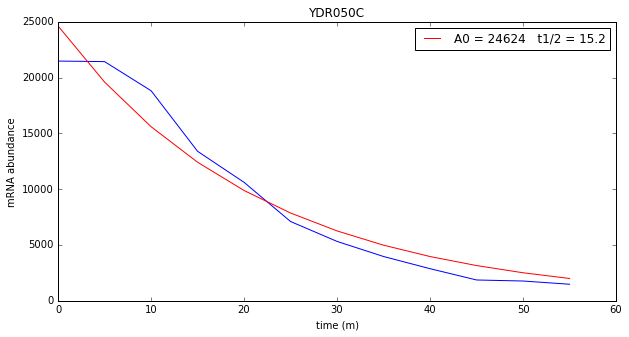

In [15]:
gene = 'YDR050C'

r = df.loc[gene]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(times,np.array(r[datacols].values), c='blue')
ax.plot(times,decayfunc(times,r['A0'],r['t_half']), c='red', label = "A0 = %d   t1/2 = %.1f" % (r['A0'],r['t_half']))
ax.set_xlabel('time (m)')
ax.set_ylabel('mRNA abundance')
ax.set_title(gene)
ax.legend()

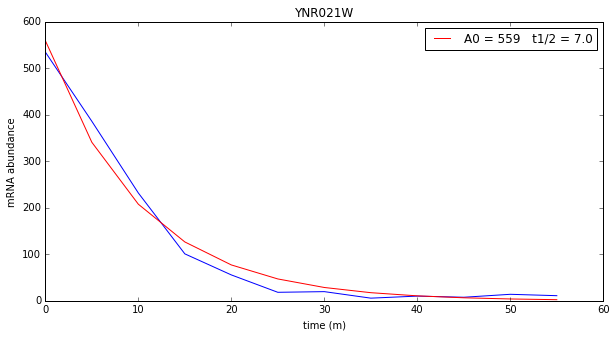

In [60]:
r = df[(df.t_half > 5.0) & (df.t_half < 25.0)].sample(1).iloc[0]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(times,np.array(r[datacols].values), c='blue')
ax.plot(times,decayfunc(times,r['A0'],r['t_half']), c='red', label = "A0 = %d   t1/2 = %.1f" % (r['A0'],r['t_half']))
ax.set_xlabel('time (m)')
ax.set_ylabel('mRNA abundance')
ax.set_title(r.name)
ax.legend()

(array([ 2214.,  1186.,   342.,   169.,    83.,    36.,    17.,    11.,
            3.,    33.]),
 array([  0.26478666,   5.23830799,  10.21182933,  15.18535066,
         20.15887199,  25.13239333,  30.10591466,  35.079436  ,
         40.05295733,  45.02647867,  50.        ]),
 <a list of 10 Patch objects>)

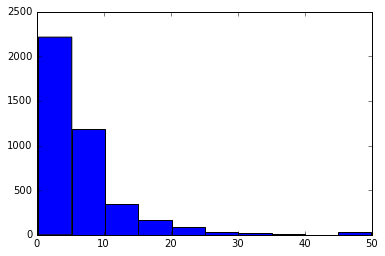

In [61]:
plt.hist(df['t_half'].values)

In [ ]:
def decayfunc_eff (t, t2, eff):
    return eff * np.power(2,-t/t2) + (1-eff)

In [ ]:
def decayfunc_A0eff (t, A0, t2, eff):
    return eff * np.power(2,-t/t2) + (1-eff)

In [ ]:
perr = np.sqrt(np.diag(cv))
print (perr)

In [ ]:
K, Alog = np.polyfit(times,np.log(data),1)

In [ ]:
print (K,Alog)